In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
%matplotlib inline

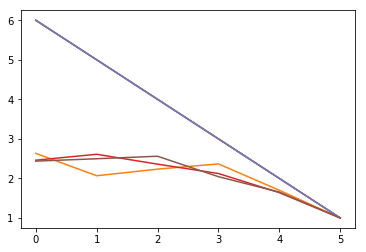

In [132]:
count = {"AllAI":10, "AllRnd":100, "RndandAI":100}
game = "Agram"

for type in count.keys():
    fopen = open("data/" + game + ".gdl" + type + "-choicestats.txt")
    data = fopen.readlines()
    fopen.close()
    nump = 4
    lead = np.zeros(6)
    follow = np.zeros(6)
    for i in range(2, len(data[1:302]), 3):
        choices = [int(x) for x in data[i][:-2].strip().split(",")]
        for j in range(len(choices)):
            if (j % nump == 0):
                lead[j // 4] += choices[j] / count[type]
            else:
                follow[j // 4] += choices[j] / ((nump - 1) * count[type])
    plt.plot(lead)
    plt.plot(follow)

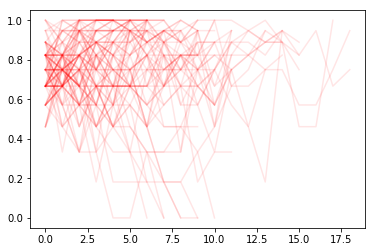

In [171]:
game = "Pairs"
type = "RndandAI"
fopen = open("data/" + game + ".gdl" + type + "-leadstats.txt")
data = fopen.readlines()
fopen.close()
nump = 2
preds = [[], [], [], []]
for d in data[2:]:
    if not d[0].isdigit():
        plt.plot(preds[0], color="r", alpha=0.1)
        for plist in preds[1:]:
            #plt.plot(plist, color="k", alpha=0.033)
            pass
        preds = [[], [], [], []]
    else:
        leads = [float(x) for x in d[:-2].strip().split(",")]
        for p in range(nump):
            preds[p].append(leads[p + 1])


In [176]:
game = "Pairs"
type = "RndandAI"
fopen = open("data/" + game + ".gdl" + type + "-resultsstats.txt")
data = fopen.readlines()
fopen.close()
nump = 2
score = []
rank = []
for i in range(nump):
    scores = [int(x) for x in data[4 + i][:-2].strip().split(",")]
    score.append(sum(scores) / count[type])
    ranks = [int(x) for x in data[4 + nump + 1 + i][:-2].strip().split(",")]
    rank.append(sum(ranks) / count[type])

In [177]:
score

[17.9, 31.24]

In [178]:
rank

[0.15, 0.85]